In [1]:
from google.colab import files
uploaded = files.upload()

Saving GLB.Ts+dSST.csv to GLB.Ts+dSST.csv


In [10]:
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import pandas as pd

# Get the actual filename
filename = list(uploaded.keys())[0]
print("Uploaded filename:", filename)

# Read the file
df = pd.read_csv(filename, skiprows=1)
df.head()


Uploaded filename: GLB.Ts+dSST.csv


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.09,-0.16,-0.10,-0.21,-.18,-.10,-.15,-.23,-.22,-.18,-.17,***,***,-0.12,-.16,-.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,.00,-.04,-.15,-.22,-.19,-.07,-.09,-.10,-.17,0.05,-.07,-.18
2,1882,0.16,0.13,0.04,-0.16,-0.14,-0.22,-.16,-.08,-.15,-.24,-.17,-.37,-.11,-.09,.07,-0.09,-.16,-.19
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-.07,-.14,-.22,-.11,-.24,-.11,-.18,-.20,-.34,-0.16,-.10,-.19
4,1884,-0.13,-0.08,-0.36,-0.40,-0.34,-0.35,-.31,-.28,-.27,-.25,-.33,-.31,-.28,-.27,-.11,-0.37,-.31,-.28


In [3]:
# Keep only the columns we need
df = df[['Year', 'J-D']]  # J-D is Jan to Dec annual anomaly

# Rename for clarity
df.columns = ['Year', 'Temp_Anomaly']

In [4]:
df = df.dropna()

In [5]:
# Filter from 2000 to 2025 (NASA may not have 2025 yet; it will show up as blank)
df = df[(df['Year'] >= 2000) & (df['Year'] <= 2025)]

In [6]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [7]:
# Preview the data
print(df.head())

   Year Temp_Anomaly
0  2000          .39
1  2001          .53
2  2002          .63
3  2003          .61
4  2004          .53


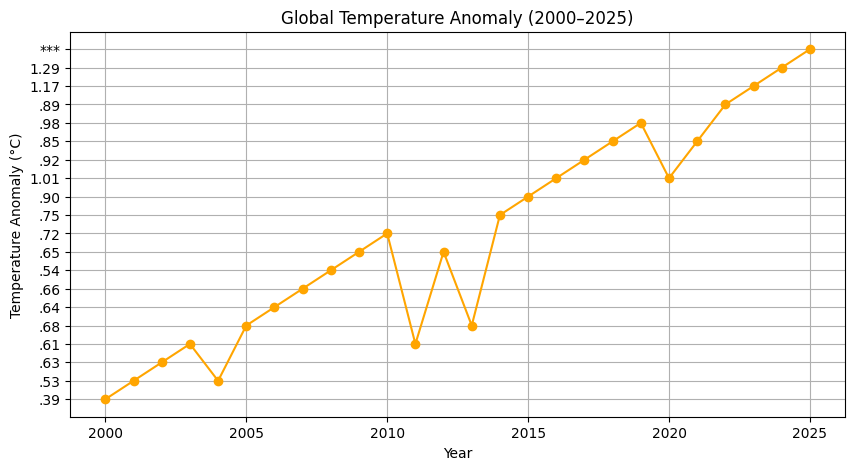

In [11]:
# 📊 Plotting with Matplotlib
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Temp_Anomaly'], marker='o', color='orange')
plt.title('Global Temperature Anomaly (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()

In [12]:
# 📊 Optional: Interactive Plotly version
fig = px.line(df, x='Year', y='Temp_Anomaly',
              title='Global Temperature Anomaly (2000–2025)',
              markers=True)
fig.show()

In [14]:
# ✅ Save cleaned CSV for dashboard use
df.to_csv('cleaned_temp_data.csv', index=False)